In [47]:
%matplotlib inline
import prospect
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point, MultiLineString, MultiPolygon
# from scipy.stats._distn_infrastructure import rv_frozen

In [10]:
exterior = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
interior = [(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5), (1, 0)][::-1]
polygon = Polygon(exterior, [interior])
base = gpd.GeoDataFrame({'name': ['test_polygon_gdf'],
                         'geometry': polygon}, geometry='geometry')

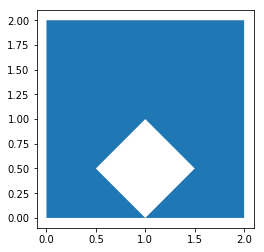

In [12]:
base.plot();

In [17]:
line_coords = [[(0, 0), (1, 1)], [(0, 1), (2, 3)], [(0, 0.5), (1, 0.5), (2.5, 0.5)]]
lines = [LineString(coords) for coords in line_coords]
lines_df = gpd.GeoDataFrame({'name': [f'test_line{i}' for i in range(len(lines))],
                       'geometry': lines
                      }, geometry='geometry')

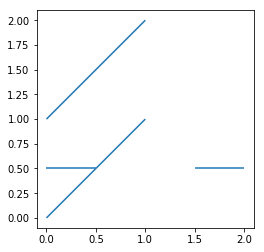

In [18]:
out = prospect.utils.clip_lines_polys(lines_polys=lines_df, by=base)
out.plot()

In [21]:
for ls in out.geometry:
    print(ls)

MULTILINESTRING ((0 0, 0.5 0.5), (0.5 0.5, 1 1))
LINESTRING (0 1, 1 2)
MULTILINESTRING ((0 0.5, 0.5 0.5), (1.5 0.5, 2 0.5))


In [36]:
exp_out = [MultiLineString([((0, 0), (0.5, 0.5)), ((0.5, 0.5), (1, 1))]),
LineString([(0, 1), (1, 2)]),
MultiLineString([((0, 0.5), (0.5, 0.5)), ((1.5, 0.5), (2, 0.5))])]

In [38]:
all(out.geometry == exp_out)

True

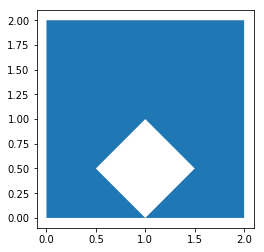

In [39]:
base.plot()

In [41]:
base.geometry

0    POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0), (1 0, 1.5 ...
Name: geometry, dtype: object

In [42]:
exterior = [(0.5, 0), (0.5, 2), (2.5, 2), (2.5, 0), (0.5, 0)]
interior = [(1.5, 0), (1.0, 0.5), (1.5, 1), (2.0, 0.5), (1.5, 0)][::-1]
polygon = Polygon(exterior, [interior])
shifted = gpd.GeoDataFrame({'name': ['test_polygon2_gdf'],
                         'geometry': polygon}, geometry='geometry')

In [43]:
clipped_poly = prospect.utils.clip_lines_polys(lines_polys=base, by=shifted)

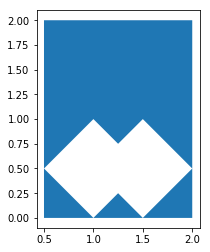

In [44]:
clipped_poly.plot()

In [46]:
for p in clipped_poly.geometry:
    print(p)

MULTIPOLYGON (((0.5 2, 2 2, 2 0.5, 1.5 1, 1.25 0.75, 1 1, 0.5 0.5, 0.5 2)), ((2 0.5, 2 0, 1.5 0, 2 0.5)), ((1.5 0, 1 0, 1.25 0.25, 1.5 0)), ((1 0, 0.5 0, 0.5 0.5, 1 0)))


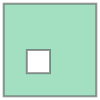

In [54]:
MultiPolygon(
    [
        (
            ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)), 
            [((0.25, 0.25), (0.25, 0.5), (0.5, 0.5), (0.5, 0.25))]
        )
    ]
)

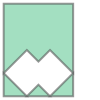

In [57]:
MultiPolygon(
    [
        (
            ((0.5, 2), (2, 2), (2, 0.5), (1.5, 1), (1.25, 0.75), (1, 1), (0.5, 0.5), (0.5, 2)),
            []
        ),
        (
            ((2, 0.5), (2, 0), (1.5, 0), (2, 0.5)),
            []
        ),
        (
            ((1.5, 0), (1, 0), (1.25, 0.25), (1.5, 0)),
            []
        ),
        (
            ((1, 0), (0.5, 0), (0.5, 0.5), (1, 0)),
            []
        )
])

In [ ]:
a = prospect.Area.from_shapefile(name='test', 
                                  path='../tests/test_datasets/shapefiles/areas/leiap_field1.shp')


In [ ]:
prospect.Layer.poisson_points(area=a, rate=10.0).shape

In [ ]:
a.set_vis_beta_dist(9, 1)

In [ ]:
a.vis.rvs()

In [ ]:
isinstance(a.vis, rv_frozen)

In [ ]:
b = prospect.Area()

In [ ]:
type(b.df)

In [ ]:
from shapely.geometry import Polygon
Polygon([(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (2.0, -1.0), (0.0, 0.0), 
        (0.25, 0.25), (0.25, 0.5), (0.5, 0.5), (0.5, 0.25), (0.25, 0.25)])

In [ ]:
import itertools
a = ["foo", "melon", 'bar']
b = [True, False]
d = ['yes', 'no']
c = list(itertools.product(a, b, c))
c

In [2]:
LEIAP_AREA_PATHS = ['leiap_field1.shp', 'leiap_field2.shp', 'leiap_field3.shp', 'leiap_field4.shp',
                    'leiap_field5.shp', 'leiap_field6.shp', 'leiap_field7.shp', 'leiap_field8.shp']
LEIAP_LAYER_PATHS = [
    'leiap_field1_points.shp',
    'leiap_field2_points.shp',
    'leiap_field3_points.shp',
    'leiap_field4_points.shp',
    'leiap_field5_polygons.shp',
    'leiap_field6_polygons_overlap_edges.shp',
    'leiap_field7_points.shp',
    'leiap_field8_polygon_single.shp'
]

AREA_LAYER_TUPLES = list(zip(LEIAP_AREA_PATHS, LEIAP_LAYER_PATHS))

for i in AREA_LAYER_TUPLES:
    print(i)

('leiap_field1.shp', 'leiap_field1_points.shp')
('leiap_field2.shp', 'leiap_field2_points.shp')
('leiap_field3.shp', 'leiap_field3_points.shp')
('leiap_field4.shp', 'leiap_field4_points.shp')
('leiap_field5.shp', 'leiap_field5_polygons.shp')
('leiap_field6.shp', 'leiap_field6_polygons_overlap_edges.shp')
('leiap_field7.shp', 'leiap_field7_points.shp')
('leiap_field8.shp', 'leiap_field8_polygon_single.shp')


In [3]:
for a, l in AREA_LAYER_TUPLES:
    print(a)
    print(l)

leiap_field1.shp
leiap_field1_points.shp
leiap_field2.shp
leiap_field2_points.shp
leiap_field3.shp
leiap_field3_points.shp
leiap_field4.shp
leiap_field4_points.shp
leiap_field5.shp
leiap_field5_polygons.shp
leiap_field6.shp
leiap_field6_polygons_overlap_edges.shp
leiap_field7.shp
leiap_field7_points.shp
leiap_field8.shp
leiap_field8_polygon_single.shp


In [4]:
from pathlib import Path
layer_list = []
for a, l in AREA_LAYER_TUPLES:
    area = prospect.Area.from_shapefile(name='test_area4layer', path=Path(
        f'../tests/test_datasets/shapefiles/areas/{a}'))
    layer = prospect.Layer.from_shapefile(path=Path(
        f'../tests/test_datasets/shapefiles/layers/{l}'), area=area, name='test_layer', feature_type=None)
    layer_list.append(layer)

In [5]:
assemb = prospect.Assemblage(name='test_assemb', layers=layer_list)

In [6]:
type(assemb.df)

geopandas.geodataframe.GeoDataFrame

In [1]:
import prospect
from shapely.geometry import Polygon

In [2]:
poly = Polygon([(1, 1), (1, 3), (4, 3), (4, 1), (1, 1)])
surv = prospect.Survey(name='test_survey')
area = prospect.Area(name='test_area', survey_name=surv.name,
                   shape=poly, vis=1.0)

In [3]:
surv.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11a788630>,
 'name': 'test_survey'}

In [4]:
area.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11a788780>,
 'name': 'test_area',
 'survey_name': 'test_survey',
 'shape': <shapely.geometry.polygon.Polygon at 0x11a7886a0>,
 'vis': 1.0,
 'df':         name  survey_name                                shape  vis
 0  test_area  test_survey  POLYGON ((1 1, 1 3, 4 3, 4 1, 1 1))  1.0}

In [5]:
type(area)

prospect.area.Area

In [8]:
isinstance(area, prospect.Area)

True